Uspešno nastavljene nastavitve


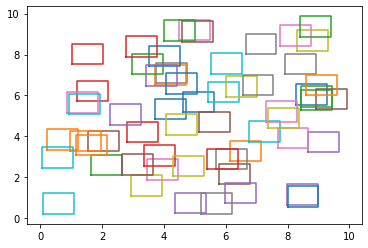

In [2]:
# Nastavitve programa (potem vse ostalo sam izračuna)
# Tukaj nastavimo število točk in omejitve za x in y
n = 60
x_min = 0
x_max = 10
y_min = 0
y_max = 10

if n <= 0:
    print("Napaka: število kvadratov mora biti pozitivno")
elif x_min >= x_max or y_min >= y_max:
    print("Napaka: napačno nastavljeni parametri")
else:
    print("Uspešno nastavljene nastavitve")

import random
from matplotlib.pyplot import plot, axis, show,axes
import matplotlib.pyplot as plt

def nakljucne_tocke(x_min, x_max, y_min, y_max, n):
    #nam da seznam n točk v koordinatnem sistemu na intervalu [x_min,x_max]x[y_min,y_max]
    rangeX = (x_min, x_max-1)
    rangeY = (y_min, y_max-1)
    tocke = []
    i = 0
    while i<n:
        x = random.uniform(*rangeX) 
        y = random.uniform(*rangeY)
        tocke.append([x,y])
        i += 1
    return tocke


seznam_tock = nakljucne_tocke(x_min, x_max, y_min, y_max, n) #seznam tock iz katerih generiramo kvadrate

def generiranje_kvadrata(tocka): # tocka je seznam [ , ]
    #generira še druge tri vogale kvadrata in jih poveze, da to nariše potrebujem za ukazom plt.show()
    x0 = tocka[0]
    y0 = tocka[1]
    x1 = x0 + 1
    x2 = x1
    x3 = x0
    y1 = y0
    y2 = y0 + 1
    y3 = y2
    return plot([x0, x1, x2, x3, x0], [y0, y1, y2, y3, y0])

seznam_slik = []
for i in range(0,len(seznam_tock)):
    tocka = seznam_tock[i]
    seznam_slik.append(generiranje_kvadrata(tocka))

for slika in seznam_slik:    #to pokaže koncno sliko vseh mojih enotskih kvadratov
     plt.plot()
plt.show()

In [3]:
def koordinate_kvadrata(tocka):
    # kot izhodni podatek nam vrne seznam koordinate enega kvadrata
    x0 = tocka[0]
    y0 = tocka[1]
    x1 = x0 + 1
    x2 = x1
    x3 = x0
    y1 = y0
    y2 = y0 + 1
    y3 = y2
    return [[x0,y0], [x1,y1], [x2,y2], [x3,y3]]

seznam_kvadratov = []   #seznam kvadratov oz. tock, ki generirajo prej narisane kvadrate
for i in seznam_tock:
    seznam_kvadratov.append(koordinate_kvadrata(i))

def najvecje_dotikanje(seznam_tock):# kot vhod dobiva seznam spodnjih levih oglišč
    # funkcija, ki reši CLP za iskanje točke, ki se dotika največ kvadratov
    n = len(seznam_tock) # n je število kvadratov
    x_min = min(x for x, y in seznam_tock)
    x_max = max(x for x, y in seznam_tock)
    y_min = min(y for x, y in seznam_tock)
    y_max = max(y for x, y in seznam_tock)

    p = MixedIntegerLinearProgram(maximization=True) # iščeva točko, ki se dotika največ kvadratov
    z = p.new_variable(binary=True) #z_i = 1 če tocka (x,y) v kvadratu i
    p.set_objective(sum(z[i] for i in range(n))) # številčenje naj gre kar od 0 do n-1
    for i, (x_i, y_i) in enumerate(seznam_tock): # za realni spremenljivki x, y indeksiramo kar p
        p.add_constraint(p['x'] + (1-z[i])*(x_max - x_min) >= x_i)   #pogoj za CLP
        p.add_constraint(p['x'] - (1-z[i])*(x_max - x_min) <= x_i + 1)   #pogoj za CLP
        p.add_constraint(p['y'] + (1-z[i])*(y_max - y_min) >= y_i)    #pogoj za CLP
        p.add_constraint(p['y'] - (1-z[i])*(y_max - y_min) <= y_i + 1)    #pogoj za CLP

    stevilo = p.solve()
    x, y = p.get_values(p['x']), p.get_values(p['y'])
    kvadrati = [k for k, v in p.get_values(z).items() if v == 1]
    return [stevilo, (x, y), kvadrati] # vrnemo število dotikanj, koordinato točke in seznam indeksov kvadratov, ki se jih dotika

najvecje_dotikanje(seznam_tock)

#seznam_kvadratov
#kvadrati = najvecje_dotikanje(seznam_tock)[2]
#for i in kvadrati:
#    print(seznam_kvadratov[i])

[5.0, (9.264358087226611, 6.275941115149412), [12, 20, 22, 45, 51]]

In [1]:
import time
#kako se spreminja čas izvajanja v odvisnosti od n (to je število izbranih točk oz kvadratov) in velikosti mreže (povečevali bomo y_max)
def cas_izvajanja(x_min, x_max, y_min, y_max ,n):
    seznam_tock = nakljucne_tocke(x_min, x_max, y_min, y_max, n)
    casi = []
    for i in range(1,n+1):
        zacetek = time.time()
        najvecje_dotikanje(seznam_tock)
        konec = time.time() - zacetek
        casi.append((konec))
    return casi
#casi v odvisnosti od n
#cas_izvajanja(0,10,0,10,30)
#cas_izvajanja(0,10,0,10,40)
#cas_izvajanja(0,10,0,10,50)
#cas_izvajanja(0,10,0,10,60)
#cas_izvajanja(0,10,0,10,70)
#cas_izvajanja(0,10,0,10,80)
#cas_izvajanja(0,10,0,10,90)
#cas_izvajanja(0,10,0,10,100)

#casi v odvisnosti od y_max
#cas_izvajanja(0,10,0,10,100)
#cas_izvajanja(0,10,0,20,100)
#cas_izvajanja(0,10,0,30,100)
#cas_izvajanja(0,10,0,40,100)
#cas_izvajanja(0,10,0,50,100)
#cas_izvajanja(0,10,0,60,100)
#cas_izvajanja(0,10,0,70,100)
#cas_izvajanja(0,10,0,80,100)
#cas_izvajanja(0,10,0,90,100)
#cas_izvajanja(0,10,0,100,100)

In [5]:
def p_max_in_p_min(x_min, x_max, y_min, y_max):
    # funcija katere izhodna podatka sta maksimalna in minimalna vrednost izmed vseh možnih k in m, ki jih lahko dosežemo
    oglisca = [(0, 0), (0, 1), (1, 0), (1, 1)]
    seznam = []
    for i, (x_i, y_i) in enumerate(seznam_tock): # izbira prvega kvadrata
        for x_j, y_j in seznam_tock[i+1:]: # izbira drugega kvadrata - brez ponovitev
            for w_i, z_i in oglisca: # izbira oglišča prvega kvadrata
                for w_j, z_j in oglisca: # izbira oglišča drugega kvadrata
                    k = ((y_j+z_j) - (y_i+z_i)) / ((x_j+w_j) - (x_i+w_i))
                    m = y_i+z_i - k * (x_i+w_i)
                    for x in (x_min, x_max+1): # vrednosti x, kjer premica doseže največjo in najmanjšo vrednost y
                        seznam.append(k*x + m)
    p_min = min(seznam)
    p_max = max(seznam)
    return [p_min, p_max]

p_min = p_max_in_p_min(x_min, x_max, y_min, y_max)[0]
p_max = p_max_in_p_min(x_min, x_max, y_min, y_max)[1]

def najvecje_dotikanjepremica(seznam_tock, p_max, p_min): # kot vhod dobita seznam spodnjih levih oglišč
    # funkcija, ki reši CLP za iskanje premice, ki se dotika največ kvadratov
    n = len(seznam_tock) # n je stevilo kvadratov 
    x_min = min(x for x, y in seznam_tock)
    x_max = max(x for x, y in seznam_tock)
    y_min = min(y for x, y in seznam_tock)
    y_max = max(y for x, y in seznam_tock)
    
    p = MixedIntegerLinearProgram(maximization=True) # iščeva točko, ki se dotika največ kvadratov
    z = p.new_variable(binary=True) #z_i = 1, če tocka (x,y) v kvadratu i
    u = p.new_variable(binary=True) #u_i = 1, če premica y = kx + m seka kvadrat i, tako, da je njegovo levo zgornje oglišče nad premico, desno spodnje ogljišče pa pod njo
    v = p.new_variable(binary=True) #v_i = 1, če premica y = kx + m seka kvadrat i,  tako, da je njegovo levo spodnje oglišče pod premico, desno zgornje ogljišče pa nad njo
    p.set_objective(sum(z[i] for i in range(n))) # številčenje od 0 do n-1
    for i, (x_i, y_i) in enumerate(seznam_tock): # za realni spremenljivki x, y indeksiramo kar p
        p.add_constraint(z[i] <= u[i]+v[i])    #pogoj za CLP
        p.add_constraint(p['k']*(x_i+1) + p['m'] + (1-u[i])*(y_max - p_min) >= y_i)    #pogoj za CLP
        p.add_constraint(p['k']*x_i + p['m'] - (1-u[i])*(p_max - y_min) <= y_i + 1)    #pogoj za CLP
        p.add_constraint(p['k']*x_i + p['m'] + (1-v[i])*(y_max - p_min) >= y_i)    #pogoj za CLP
        p.add_constraint(p['k']*(x_i+1) + p['m'] - (1-v[i])*(p_max - y_min) <= y_i + 1)    #pogoj za CLP

    stevilo = p.solve() #resis sistem
    k, m = p.get_values(p['k']), p.get_values(p['m']) #vrednosti, kjer dosezes max od vsote z_i
    kvadrati = [k for k, v in p.get_values(z).items() if v == 1]
    return [stevilo, (k, m), kvadrati] # vrnemo število dotikanj, koeficient in zacetno vrednost premice in seznam indeksov kvadratov, ki se jih premica dotika

najvecje_dotikanjepremica(seznam_tock,p_max,p_min)

[18.0,
 (0.8692548123233682, 1.559674710648847),
 [0, 2, 8, 10, 13, 15, 18, 19, 28, 31, 36, 39, 40, 41, 42, 44, 47, 49]]

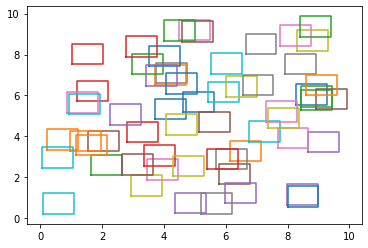

In [6]:
seznam_slik = []
for i in range(0,len(seznam_tock)):
    tocka = seznam_tock[i]
    seznam_slik.append(generiranje_kvadrata(tocka))

for slika in seznam_slik:    #to pokaže končno sliko vseh zgenereranih enotskih kvadratov(Spet ista kot tista spodaj za boljšo preglednost)
     plt.plot()
plt.show()

In [0]:
import time
#kako se spreminja čas izvajanja CLP premice v odvisnosti od n (to je število izbranih točk oz kvadratov)
def cas_izvajanja_premica(x_min, x_max, y_min, y_max ,n):
    seznam_tock = nakljucne_tocke(x_min, x_max, y_min, y_max, n)
    p_min = p_max_in_p_min(x_min, x_max, y_min, y_max)[0]
    p_max = p_max_in_p_min(x_min, x_max, y_min, y_max)[1]
    casi = []
    for i in range(1,n+1):
        zacetek = time.time() 
        najvecje_dotikanjepremica(seznam_tock,p_max,p_min)
        konec = time.time() - zacetek
        casi.append((konec))
    return casi
#casi v odvisnosti od n
#pognala sva:
#cas_izvajanja_premica(0,10,0,10,10)
#cas_izvajanja_premica(0,10,0,10,20)
#cas_izvajanja_premica(0,10,0,10,30)
#cas_izvajanja_premica(0,10,0,10,40)